# End of Week 12 Template - Time Series and Forecasting
#### Emily Hamling

In [145]:
# Import libraries
import pandas as pd
from pandas.tseries.frequencies import infer_freq
from pandas.tseries.offsets import QuarterEnd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Exercise 1
#### Setting up Time Series - Read in the home_price_index.csv • Split the data into 2 dataframes (one for Ames and one for Corvallis) • Turn both into Time Series dataframes • Try a 4 and 6 quarter moving average. Graph both out with the original data. • Which visually looks better for forecasting?

In [148]:
# Read in and split the home price index data
home_df = pd.read_csv("home_price_index.csv")

In [149]:
ames = home_df[home_df['City']=='Ames']
corv = home_df[home_df['City']=='Corvallis']

In [150]:
# Add Quarter column and calculate moving averages
ames['Quarter'] =  range(1, len(ames)+1)
corv['Quarter'] =  range(1, len(corv)+1)

C:\Users\elham\AppData\Local\Temp\ipykernel_29628\1138037889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Quarter'] =  range(1, len(ames)+1)
C:\Users\elham\AppData\Local\Temp\ipykernel_29628\1138037889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corv['Quarter'] =  range(1, len(corv)+1)


### <font color='red'>Using .rolling with window = 4 and 6  and .mean to get the 4 and 6 quarter moving averages</font>

In [152]:
ames['SMA_4'] = ames.loc[:,'Value'].rolling(window=4).mean()
corv['SMA_4'] = corv.loc[:,'Value'].rolling(window=4).mean()

C:\Users\elham\AppData\Local\Temp\ipykernel_29628\1760508739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['SMA_4'] = ames.loc[:,'Value'].rolling(window=4).mean()
C:\Users\elham\AppData\Local\Temp\ipykernel_29628\1760508739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corv['SMA_4'] = corv.loc[:,'Value'].rolling(window=4).mean()


In [153]:
ames['SMA_6'] = ames.iloc[:,1].rolling(window=6).mean()
corv['SMA_6'] = corv.iloc[:,1].rolling(window=6).mean()

C:\Users\elham\AppData\Local\Temp\ipykernel_29628\1393316191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['SMA_6'] = ames.iloc[:,1].rolling(window=6).mean()
C:\Users\elham\AppData\Local\Temp\ipykernel_29628\1393316191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corv['SMA_6'] = corv.iloc[:,1].rolling(window=6).mean()


In [154]:
display(ames)

,Date,Value,City,Quarter,SMA_4,SMA_6
0,1977-03-31,40.62200,Ames,1,NaN,NaN
1,1977-06-30,42.08477,Ames,2,NaN,NaN
2,1977-09-30,43.20443,Ames,3,NaN,NaN
3,1977-12-31,44.46347,Ames,4,42.593668,NaN
4,1978-03-31,45.40231,Ames,5,43.788745,NaN
...,...,...,...,...,...,...
159,2016-12-31,143.13459,Ames,160,142.692990,141.018320
160,2017-03-31,145.33262,Ames,161,144.336585,142.306663
161,2017-06-30,150.41744,Ames,162,146.006898,144.420337
162,2017-09-30,153.12639,Ames,163,148.002760,146.815028


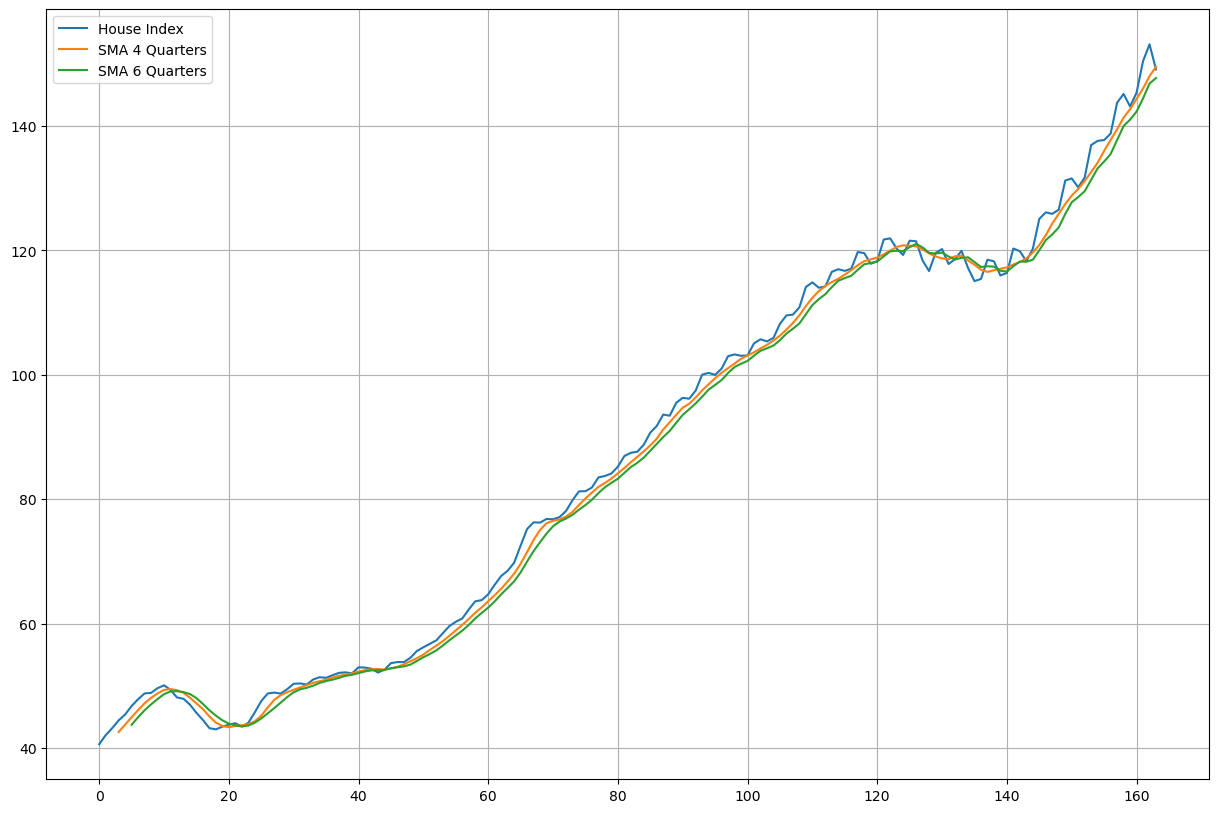

In [155]:
# Plot ames
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(ames['Value'],label='House Index')
plt.plot(ames['SMA_4'],label='SMA 4 Quarters')
plt.plot(ames['SMA_6'],label='SMA 6 Quarters')
plt.legend(loc=2)

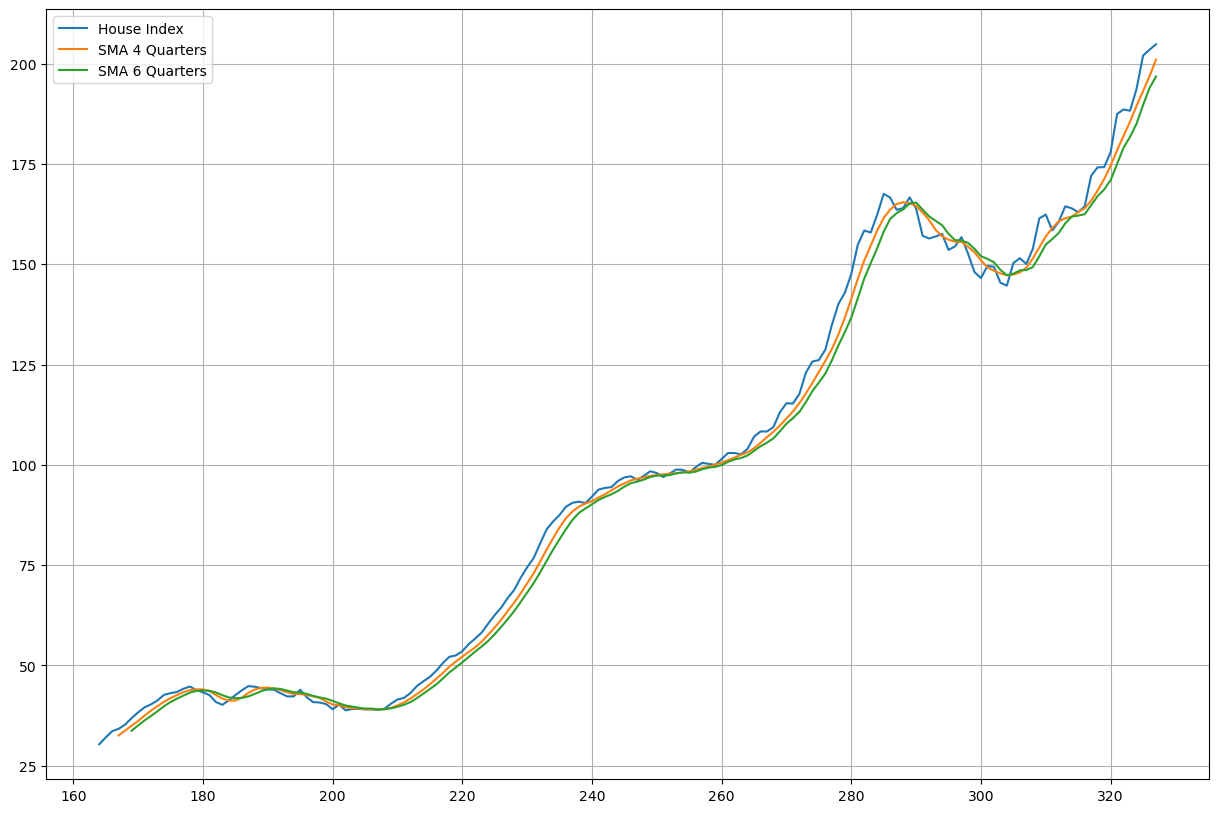

In [156]:
# Plot corvallis
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(corv['Value'],label='House Index')
plt.plot(corv['SMA_4'],label='SMA 4 Quarters')
plt.plot(corv['SMA_6'],label='SMA 6 Quarters')
plt.legend(loc=2)

### <font color='red'>Which was the better forecaster? How many quarters back (n)?</font>

# 4 Quarters tracks more closely

# Exercise 2
#### Compare WMA & Exp Smoothing • Using the same dataset, visually compare the simple Moving Average and Exponential Smoothing (using .ewm() and span=same number of quarters ) • Use 2010-2017 (20%) as the test set and the rest of the data as the training (80%) • What is the MAE for these 2 methods? Which is lowest?

### <font color='red'>Using .exm with span = the same window you had from Exercise 1</font>

In [161]:
# Exponential Smoothing
ames['Exp'] = ames.loc[:,'Value'].ewm(span=4).mean() 
corv['Exp'] = corv.loc[:,'Value'].ewm(span=4).mean()

C:\Users\elham\AppData\Local\Temp\ipykernel_29628\3972654746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Exp'] = ames.loc[:,'Value'].ewm(span=4).mean()
C:\Users\elham\AppData\Local\Temp\ipykernel_29628\3972654746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corv['Exp'] = corv.loc[:,'Value'].ewm(span=4).mean()


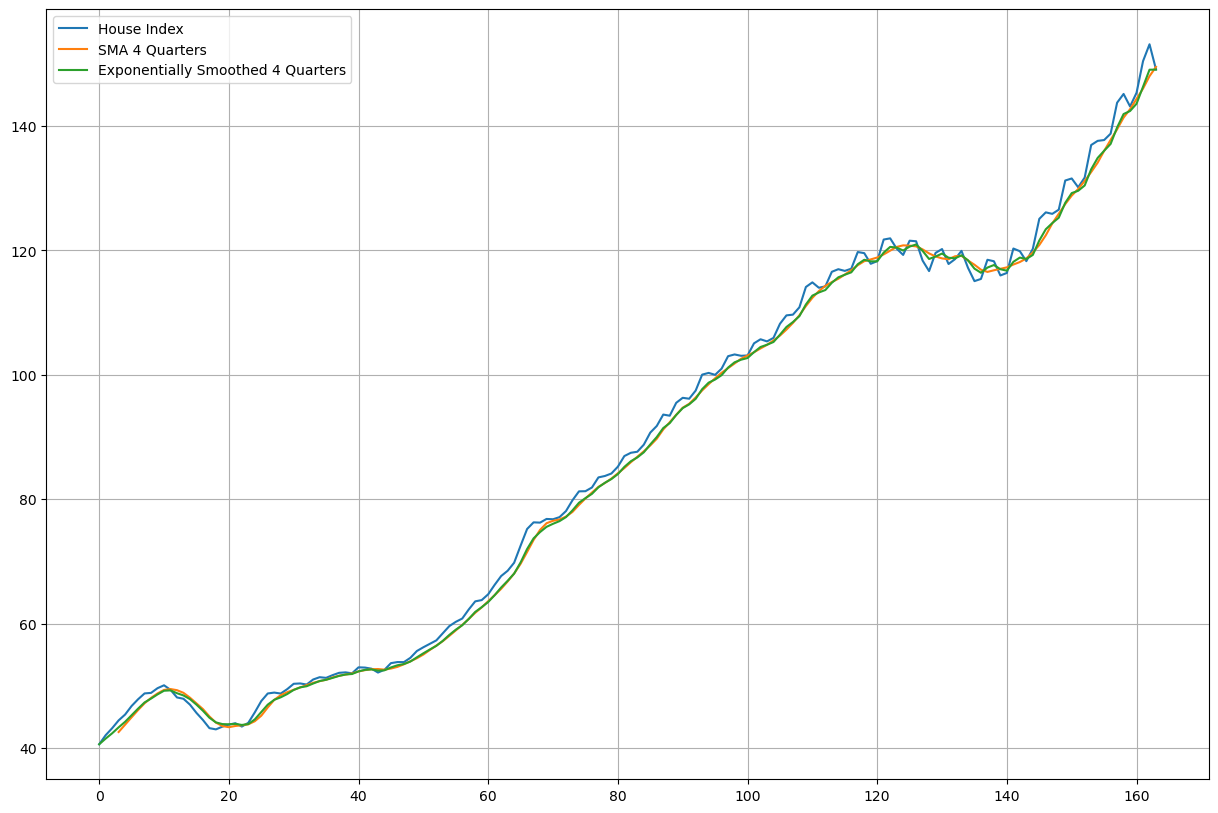

In [162]:
# Plot Exponential Smoothing for Ames
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(ames['Value'],label='House Index')
plt.plot(ames['SMA_4'],label='SMA 4 Quarters')
plt.plot(ames['Exp'],label='Exponentially Smoothed 4 Quarters')
plt.legend(loc=2)
plt.show()

# Exponential Smoothing vs. Moving Average (visually which looks better)?

Looking at MAE

In [165]:
from sklearn.metrics import mean_absolute_error as mae

In [166]:
# Convert Date and split into train/test sets
ames['Date'] = pd.to_datetime(ames['Date'])
corv['Date'] = pd.to_datetime(corv['Date'])

C:\Users\elham\AppData\Local\Temp\ipykernel_29628\2816117954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Date'] = pd.to_datetime(ames['Date'])
C:\Users\elham\AppData\Local\Temp\ipykernel_29628\2816117954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corv['Date'] = pd.to_datetime(corv['Date'])


In [167]:
ames = ames.set_index('Date')
corv = corv.set_index('Date')

### <font color='red'>Train up through 2011 and test from 2012 onwards then calculate MAE</font>

In [169]:
ames_train = ames.loc[:'2011']
ames_test = ames.loc['2012':]
corv_train = corv.loc[:'2011'] 
corv_test = corv.loc['2012':]

In [170]:
# Calculate MAE
mae_MA_ames = mae(ames_test['Value'], ames_test['SMA_4'])
mae_MA_corv = mae(corv_test['Value'], corv_test['SMA_4'])

mae_EXP_ames = mae(ames_test['Value'], ames_test['Exp'])
mae_EXP_corv = mae(corv_test['Value'], corv_test['Exp']) 

In [171]:
print(f"MAE for Ames for Simple Moving Average: {mae_MA_ames}")
print(f"MAE for Corvallis for Simple Moving Average: {mae_MA_corv}") 

print(f"MAE for Ames for Exponential Smoothing: {mae_EXP_ames}")
print(f"MAE for Corvallis for Exponential Smoothing: {mae_EXP_corv}") 

MAE for Ames for Simple Moving Average: 2.2387683333333332
MAE for Corvallis for Simple Moving Average: 3.805114895833333
MAE for Ames for Exponential Smoothing: 2.0640714751082796
MAE for Corvallis for Exponential Smoothing: 3.454246178399367


### In both cases, MAE is lower for Exponential Smoothing

# Exercise 3 - ARIMA and TBATS
#### Compare ARIMA and TBATS (all elements=True) models for Ames • Fit and graph the forecasts again with 80/20 training/test split. You can use the same split dataframes from Exercise 2 • Note your fh (forecast horizon) for TBATS is range(1,25) (24 quarters from 2012-2017), your sp=4, and your y=ames_train[‘Value’] • Which has the lower MAE? Is it lower than Exercise 2?cise 2?
ise 2?


### Here we use TBATS and ARIMA (more comprehensive forecasters)

In [175]:
from sktime.forecasting.tbats import TBATS  
# Fit TBATS model on Ames
y = ames_train['Value'] 
forecaster = TBATS(  
    use_box_cox=True,
    use_trend=True,
    use_damped_trend=True,
    sp=4, 
    use_arma_errors=True,
    n_jobs=1)
forecaster.fit(y)  
y_pred = forecaster.predict(fh=range(1,25))  

In [176]:
print(y_pred)

2012-03-31    115.469687
2012-06-30    116.159622
2012-09-30    116.274066
2012-12-31    115.459256
2013-03-31    115.222404
2013-06-30    115.915777
2013-09-30    116.033965
2013-12-31    115.223403
2014-03-31    114.990383
2014-06-30    115.686977
2014-09-30    115.808676
2014-12-31    115.002100
2015-03-31    114.772672
2015-06-30    115.472287
2015-09-30    115.597279
2015-12-31    114.794442
2016-03-31    114.568383
2016-06-30    115.270831
2016-09-30    115.398910
2016-12-31    114.599580
2017-03-31    114.376682
2017-06-30    115.081785
2017-09-30    115.212760
2017-12-31    114.416720
Freq: QE-DEC, Name: Value, dtype: float64


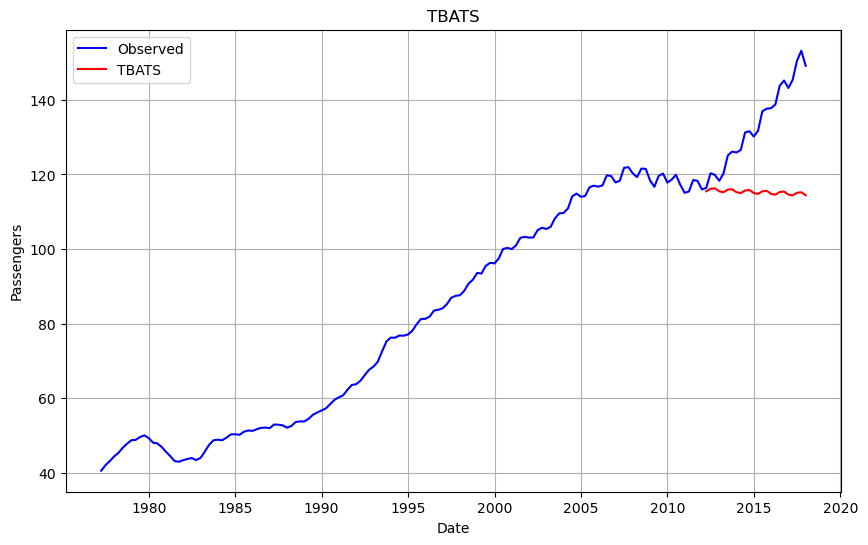

In [177]:
# plot the observed data and forecast = Plot TBATS forecast
plt.figure(figsize=(10, 6))
plt.plot(ames.index, ames['Value'], label='Observed', color='blue')
plt.plot(y_pred.index,y_pred.values, label='TBATS', color='red')

#plt.fill_between(forecast.index, ci_lower, ci_upper, color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('TBATS')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)

In [178]:
# MAE for TBATS
mae_TBATS_ames = mae(ames_test['Value'], y_pred)
print(f"MAE for Ames for TBATS: {mae_TBATS_ames}")

MAE for Ames for TBATS: 18.228958019331547


### ARIMA Model

In [180]:
# Fit ARIMA model
model = ARIMA(ames_train["Value"], order=(1,1,1))
model_fit = model.fit()

C:\Users\elham\anaconda3\download\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\elham\anaconda3\download\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\elham\anaconda3\download\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\elham\anaconda3\download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


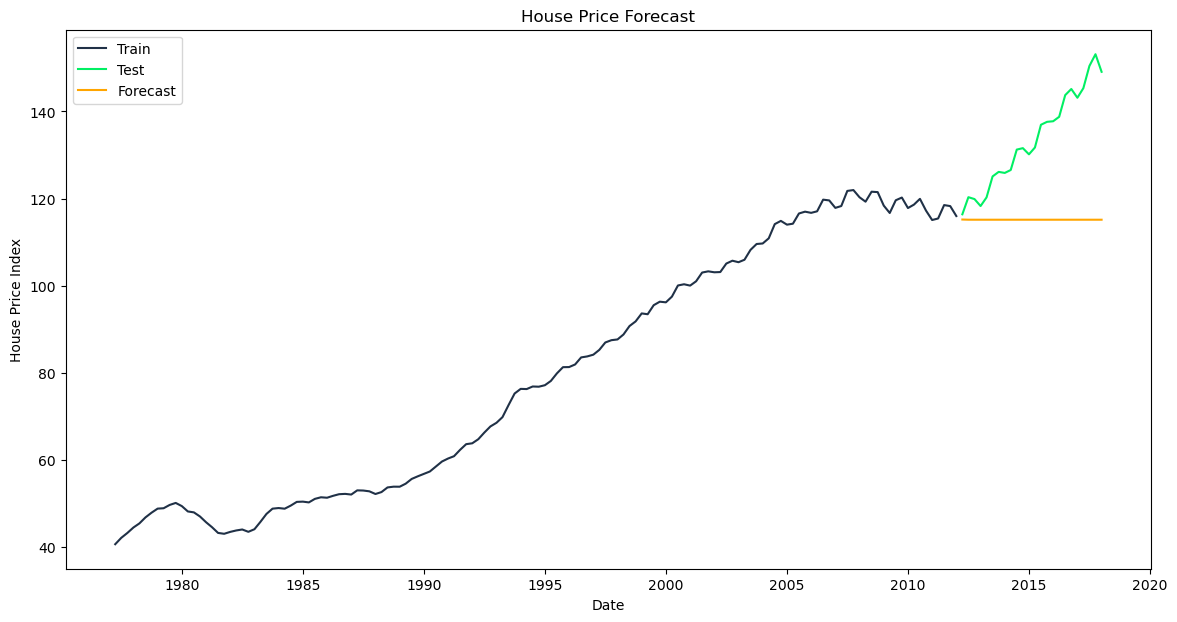

In [181]:
# Forecast
forecast = model_fit.forecast(steps=len(ames_test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(ames_train.index, ames_train["Value"], label='Train', color='#203147')
plt.plot(ames_test.index, ames_test["Value"], label='Test', color='#01ef63')
plt.plot(ames_test.index, forecast, label='Forecast', color='orange')
plt.title('House Price Forecast')
plt.xlabel('Date')
plt.ylabel('House Price Index')
plt.legend()
plt.show()

In [182]:
mae_ARIMA_ames = mae(ames_test['Value'], forecast)
print(f"MAE for Ames for ARIMA: {mae_ARIMA_ames}")

MAE for Ames for ARIMA: 18.382822728842495


### <font color='red'>How are ARIMA and TBATS MAE compared to Exercise 2?</font>
### Below is not required, but shows what happens if we shorten the testing window

# They are both poor forecasters because they dont see a sharp upward trend coming in 2012

In [185]:
ames_train2 = ames.loc[:'2015']
ames_test2 = ames.loc['2016':]
from sktime.forecasting.tbats import TBATS
y = ames_train2['Value']
forecaster = TBATS(  
    use_box_cox=True,
    use_trend=True,
    use_damped_trend=True,
    sp=4,
    use_arma_errors=True,
    n_jobs=1)
forecaster.fit(y)  
y_pred = forecaster.predict(fh=range(1,9))  

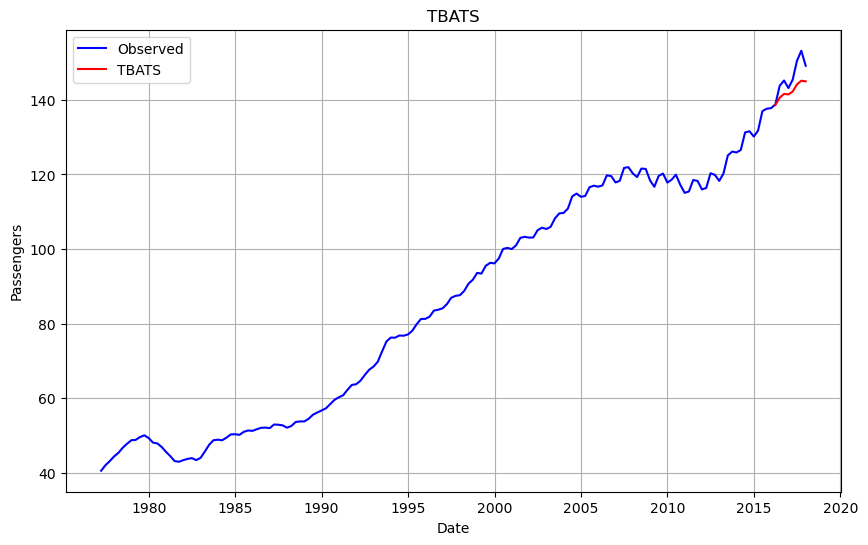

In [186]:
# plot the observed data and forecast
plt.figure(figsize=(10, 6))
plt.plot(ames.index, ames['Value'], label='Observed', color='blue')
plt.plot(y_pred.index,y_pred.values, label='TBATS', color='red')

#plt.fill_between(forecast.index, ci_lower, ci_upper, color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('TBATS')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.grid(True)

In [187]:
mae_TBATS_ames = mae(ames_test2['Value'], y_pred)
print(f"MAE for Ames for TBATS: {mae_TBATS_ames}")

MAE for Ames for TBATS: 3.7885779843643093


Then, the MAE is much lower with this shorter forecast horizon.

# Exercise 4 - Machine Learning

### In Exercise 4, we'll read in interest_and_inflation.csv and use those columns along with Ames House Price Index as predictors to predict our target variable - Corvallis index (continuous)

### Let's compare simple linear regression with Ridge Regression

#### Read in inflation_and_interest.csv • Compare Linear Regression and Ridge Regression for machine learning with time series (our target variable is continuous). • You can use sklearn’s train_test_split. Just make sure the parameter shuffle=False • Visualize both of those. • Which has the higher R^2? • Is the regression MAE lower than for previous exercises?

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [193]:
#Read in the interest and inflation csv
new_df = pd.read_csv("Interest_and_Inflation.csv")
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df = new_df.set_index('Date')

In [194]:
new_df.head()

,Inflation,Interest
Date,,
1977-03-31,6.1,4.66
1977-06-30,6.5,5.16
1977-09-30,6.6,5.82
1977-12-31,6.5,6.51
1978-03-31,6.4,6.76


In [195]:
# Merge Ames with data
merged_df = ames.join(new_df)

In [196]:
merged_df

,Value,City,Quarter,SMA_4,SMA_6,Exp,Inflation,Interest
Date,,,,,,,,
1977-03-31,40.62200,Ames,1,NaN,NaN,40.622000,6.1,4.66
1977-06-30,42.08477,Ames,2,NaN,NaN,41.536231,6.5,5.16
1977-09-30,43.20443,Ames,3,NaN,NaN,42.387353,6.6,5.82
1977-12-31,44.46347,Ames,4,42.593668,NaN,43.341451,6.5,6.51
1978-03-31,45.40231,Ames,5,43.788745,NaN,44.235300,6.4,6.76
...,...,...,...,...,...,...,...,...
2016-12-31,143.13459,Ames,160,142.692990,141.018320,142.401841,1.8,0.45
2017-03-31,145.33262,Ames,161,144.336585,142.306663,143.574152,1.8,0.70
2017-06-30,150.41744,Ames,162,146.006898,144.420337,146.311467,1.6,0.95


In [197]:
# Now let's fit our ridge regression model
# Ridge Regression on Ames + macro to predict Corvalli

In [198]:
X = merged_df[['Value','Inflation','Interest']]
y = corv['Value'] 

In [199]:
#Do shuffle=False so that it doesn't randomly rearrange the order.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False)


In [200]:
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = mae(y_test, predictions) 


In [201]:
print(score)

6.703792510018283


# We can do the same for linear regression

In [203]:
# Ridge Regression on Ames + macro to predict Corvalli
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = mae(y_test, predictions)
print(score)

6.685301798766717


### In this case simple linear regression was a better predictor

In [205]:
mae_lin_reg = mae(y_test, predictions)
print(f"MAE for using Ames, Inflation, and Interest to Predict Corvallis: {mae_lin_reg}")

MAE for using Ames, Inflation, and Interest to Predict Corvallis: 6.685301798766717


# The lowest MAE was for Exponential Smoothing because the data needs recent data for it to run properly. 